<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Feature%20Selection%20Complete/Filter%20Methods/Univariate_model_performance_using_feature_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 4.1 MB/s eta 0:00:00


## **Univariate Performance with Feature-engine**

This procedure works as follows:

Train a ML model per every single feature
Determine the performance of the models
Select features if model performance is above a certain threshold

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from feature_engine.selection import SelectBySingleFeaturePerformance

In [3]:
# Mount the google drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Import the data
filename = "/content/drive/MyDrive/Data Science/Feature Selection/dataset_2.csv"
df = pd.read_csv(filename)
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [5]:
# Separate train and test set
X = df.drop(labels=["target"], axis=1)
y = df["target"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [7]:
# Set up a machine learning model
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)

In [8]:
# set up the selctor
sel = SelectBySingleFeaturePerformance(
    variables=None,  # All the variables in the dataset
    estimator=rf,
    scoring="roc_auc",
    cv=3,
    threshold=0.5
)

In [9]:
# Find the predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=-1,
                                                                  random_state=1),
                                 threshold=0.5)

In [10]:
# the feature performance store the dictionary of the feature: metric pairs
# in this case roc-auc of each individual features

sel.feature_performance_

{'var_1': 0.4875982790430009,
 'var_2': 0.5058413839909245,
 'var_3': 0.4905952155521424,
 'var_4': 0.5012817866425978,
 'var_5': 0.5015468626497913,
 'var_6': 0.5002462643636112,
 'var_7': 0.5053988641280895,
 'var_8': 0.5087116177196195,
 'var_9': 0.4986495863809893,
 'var_10': 0.5039336919281457,
 'var_11': 0.504520052814282,
 'var_12': 0.5033291028426544,
 'var_13': 0.5012504781289674,
 'var_14': 0.5095390412561271,
 'var_15': 0.506699563631579,
 'var_16': 0.5770565890399896,
 'var_17': 0.4963244795239638,
 'var_18': 0.5023867907945436,
 'var_19': 0.5014536517078545,
 'var_20': 0.4951945754274834,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030795886421908,
 'var_23': 0.5031365840180948,
 'var_24': 0.4987116496464603,
 'var_25': 0.4971818936333512,
 'var_26': 0.49633718830919227,
 'var_27': 0.4977015562041136,
 'var_28': 0.5066273507747825,
 'var_29': 0.503307820654075,
 'var_30': 0.5062959771112423,
 'var_31': 0.49807485585764527,
 'var_32': 0.49568328120564,
 'var_33': 0.5096511

Text(0, 0.5, 'roc-auc')

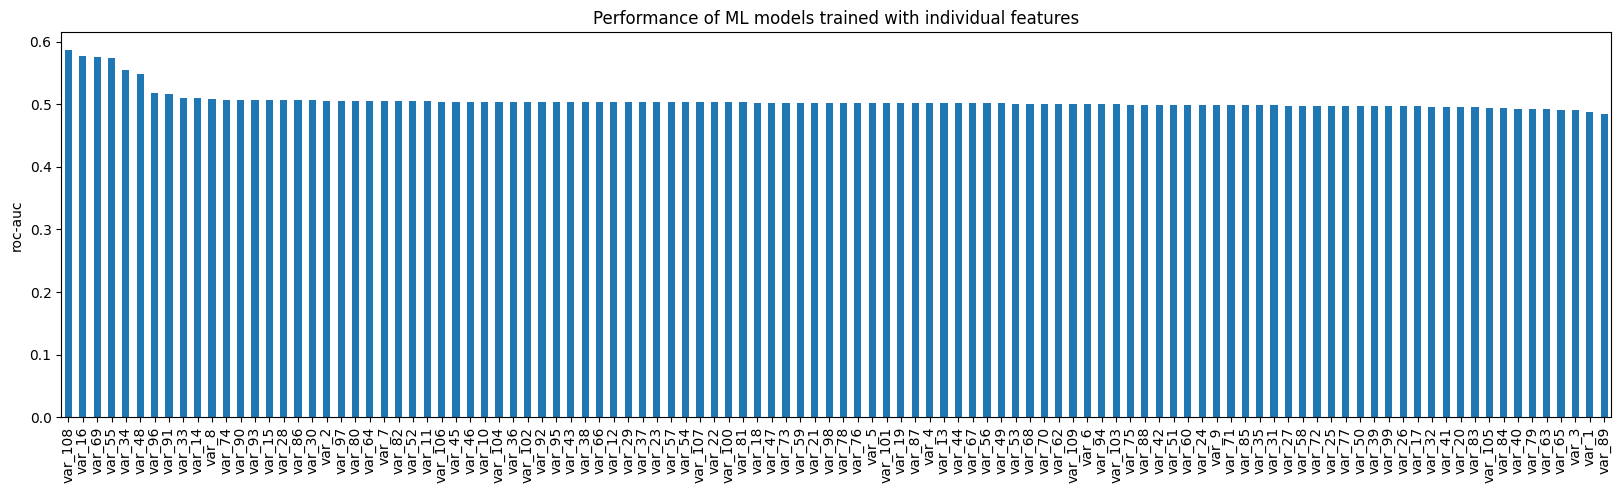

In [12]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title("Performance of ML models trained with individual features")
plt.ylabel("roc-auc")

In [14]:
# the features that will be removed
len(sel.features_to_drop_)

36

In [15]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))